# Introduction to Data Processing With Tidyverse 



- Introduction
- RStudio
- Read Excel Data
    - Import `tidyverse`
    - Read Excel data with `readxl`
    - Inspect a data frame
    - Add parameters to read Excel data properly
    - Rename columns/variables
    - Exercise 1: read in data
- Tidy Data
    - Obervations and variables
    - Gather messy data to create tidy data
    - Exercise 2: tidy the tv-program dataframe 
- Process Data
    - Handle missing values 
    - Select variables
    - Combine variables 
    - Filter observations
    - Arrange observations
    - Exercise 3: arrange income by multiple columns
- Summarise (Aggregate) Data
    - Bigger datasets
    - Date columns
    - Group by common values
    - Aggregation functions: sum, mean, first, median, count
    - Exercise 4 - investigate trip duration median of 2 months
- Combine Data Tables
    - Append tables of similar data
    - Exercise 5 - explore anti join
    - Join tables with common variables
    - Exercise 6 - finalize cleanup
- Sharing Insights
    - Simple visualizations with ggplot2
    - Mess up data for presentation with pivot
    - More visualizations
    - Save to Excel (and other formats)

## Handy shortcuts in RStudio:
- The pipe operator `%>%` : ctrl + shift + m
- run by line windows: shift + enter 
- run by line mac: command + enter)
- indent code mac: command + I 
- comment multiple lines: shift + command + c

## Read Excel Data

### Importing packages

In [26]:
library(tidyverse)
library(readxl)

### Read Excel data with readxl

In [27]:
# set working directory:
setwd("/Users/avoje001/Documents/customers/FFI/intro_data_processing")
data_path = paste(getwd(),"/data/",sep="")

#pd.read_excel("../data/kap1.xlsx")
read_excel(paste(getwd(),"/data/kap1.xlsx",sep="")) %>% View()


New names:
* `` -> `...2`


Dette regnearket inneholder tallene bak figurene i,...2
<chr>,<chr>
Kapittel 1 Hovedlinjer i den <U+00F8>konomiske politikken og utsiktene for norsk <U+00F8>konomi,NA
NA,NA
Figur 1.1,Samlet overskudd i statsbudsjettet og Statens pensjonsfond. Pst. av trend-BNP for Fastlands-Norge
Figur 1.2,Finanspolitisk respons p<U+00E5> virusutbruddet i utvalgte land


In [3]:
read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), sheet="1.2") %>% View()

#pd.read_excel("../data/kap1.xlsx", sheet_name="1.2")

New names:
* `` -> `...3`


Figur 1.2,Finanspolitisk respons på virusutbruddet i utvalgte land.,...3
<chr>,<chr>,<chr>
NA,Pst. av BNP,NA
NA,NA,NA
NA,NA,NA
NA,Budsjettiltak,L<U+00E5>n og garantier
India,0.7,0
Frankrike,0.7,13.9
Russland,0.9,0.6
Spania,1.2,9.8000000000000007
Italia,1.2,32.4


### Inspect information in data frame

In [28]:
summary(read_excel(paste(getwd(),"/data/kap1.xlsx",sep="")))
summary(read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), sheet="1.2"))

#pd.read_excel("../data/kap1.xlsx", sheet_name="1.2").info()

New names:
* `` -> `...2`


 Dette regnearket inneholder tallene bak figurene i     ...2          
 Length:4                                           Length:4          
 Class :character                                   Class :character  
 Mode  :character                                   Mode  :character  

New names:
* `` -> `...3`


  Figur 1.2        
 Length:23         
 Class :character  
 Mode  :character  
 Finanspolitisk respons p<U+00E5> virusutbruddet i utvalgte land. \r\n       
 Length:23                                                            
 Class :character                                                     
 Mode  :character                                                     
     ...3          
 Length:23         
 Class :character  
 Mode  :character  

### Add parameters to read Excel data properly

In [29]:
read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), sheet="1.2", skip=5) %>% 
  View()


#pd.read_excel("../data/kap1.xlsx", sheet_name="1.2", header=5)

India,0.7,0
<chr>,<dbl>,<chr>
Frankrike,0.7,13.9
Russland,0.9,0.6
Spania,1.2,9.8000000000000007
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0
Nederland,2.7,-
Brasil,2.9,4.2


In [7]:
read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), sheet="1.2", skip=4) %>% 
  View()

#pd.read_excel("../data/kap1.xlsx", sheet_name="1.2", header=4)


New names:
* `` -> `...1`


...1,Budsjettiltak,Lån og garantier
<chr>,<dbl>,<chr>
India,0.7,0
Frankrike,0.7,13.9
Russland,0.9,0.6
Spania,1.2,9.8000000000000007
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0
Nederland,2.7,-


In [35]:
budget <- read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), sheet="1.2", skip=4)

New names:
* `` -> `...1`


In [36]:
summary(budget)

     ...1           Budsjettiltak    L<U+00E5>n og garantier       
 Length:19          Min.   : 0.700   Length:19              
 Class :character   1st Qu.: 1.350   Class :character       
 Mode  :character   Median : 2.900   Mode  :character       
                    Mean   : 3.663                          
                    3rd Qu.: 5.000                          
                    Max.   :10.600                          

In [37]:
# extract first row: 

budget %>% head(1) %>% 
View()


...1,Budsjettiltak,Lån og garantier
<chr>,<dbl>,<chr>
India,0.7,0


In [38]:
# extract the rows where country is Norway
budget %>% 
  rename(Land = 1) %>% 
  filter(Land =="Norge") %>% 
  View()


Land,Budsjettiltak,Lån og garantier
<chr>,<dbl>,<chr>
Norge,5.1,4


In [34]:
# select columns the dplyr way
budget %>% 
select(Budsjettiltak) %>% 
View()


Budsjettiltak
<dbl>
0.7
0.7
0.9
1.2
1.2
1.5
1.7
2.5
2.7


In [39]:
# if encoding makes it difficult like here, select by index
budget %>% 
select("Lån og garantier") %>% 
View()

ERROR: [1m[33mError[39m in `select()`:[22m
[33m![39m Can't subset columns that don't exist.
[31mx[39m Column `L<U+00E5>n og garantier` doesn't exist.


In [42]:
# select by index
budget %>% 
select(3) %>% 
View()

Lån og garantier
<chr>
0
13.9
0.6
9.8000000000000007
32.4
6.4
5.4
0
-


In [43]:
# you can also select columns the base-R way

budget$`Lån og garantier`

[1] "0"                  "13.9"               "0.6"               
 [4] "9.8000000000000007" "32.4"               "6.4"               
 [7] "5.4"                "0"                  "-"                 
[10] "4.2"                "15.7"               "5"                 
[13] "29.6"               "5.3"                "4"                 
[16] "3.3"                "4.2"                "10.4"              
[19] "1.9"

In [44]:
# look now at column names:
colnames(budget)

[1] "...1"             "Budsjettiltak"    "L<U+00E5>n og garantier"

In [47]:
# fix the column names and store everything in a nice dataframe
budget <- read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), sheet="1.2", skip=4) %>% 
          rename(land = 1,
                 tiltak = 2, 
                 lan = 3)

budget

New names:
* `` -> `...1`


land,tiltak,lan
<chr>,<dbl>,<chr>
India,0.7,0
Frankrike,0.7,13.9
Russland,0.9,0.6
Spania,1.2,9.8000000000000007
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0
Nederland,2.7,-


### Exercise 1:

Read data from the file ..\data\driftsinntekter-2021.xls with R.
Which parameters do you need to specify?

Use the readxl documentation to look up available parameters.

https://readxl.tidyverse.org/

In [20]:
#solution:
read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""), skip=1) %>% View()


Category,2019,2020,2021
<chr>,<chr>,<chr>,<chr>
Basistilskudd,216,203,202
Basistilskudd personell og kompetanse,-,-,3
Forvaltningsmidler,307.7,196.9,-
Tilskudd H.U. Sverdrup II,284.3,274.2,200.1
Tilskudd Kjemiidentifikasjonslab,107.1,55.7,88.8
CBRNE-satsningen,-,-,85
Tilskudd og overf<U+00F8>ringer,389.4,439.1,341.8
Strategiske FoU-midler,2131.1,2109,2159
Konsept- og forprosjekteringsmidler,838.2,696.2,635.1


## Tidy Data

### Observations and variables

Hadley Wickham introduced the term **tidy data** (<https://tidyr.tidyverse.org/articles/tidy-data.html>). Data tidying is a way to **structure DataFrames to facilitate analysis**.

A DataFrame is tidy if:

- Each variable is a column
- Each observation is a row
- Each DataFrame contains one observational unit

Note that tidy data principles are closely tied to normalization of relational databases.

In [48]:
income <- read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
          rename(category=Category)


Is the `income` data frame tidy?

> No, _2019_, _2020_, and _2021_ are not variables. They are values of a _year_ variable

### Gather messy datasets to tidy them

In [49]:
read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
  rename(category=Category) %>% 
  gather() %>% 
  View()

key,value
<chr>,<chr>
category,Basistilskudd
category,Basistilskudd personell og kompetanse
category,Forvaltningsmidler
category,Tilskudd H.U. Sverdrup II
category,Tilskudd Kjemiidentifikasjonslab
category,CBRNE-satsningen
category,Tilskudd og overf<U+00F8>ringer
category,Strategiske FoU-midler
category,Konsept- og forprosjekteringsmidler


In [50]:
read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
  rename(category=Category) %>% 
  gather(category) %>% View()

read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
  rename(category=Category) %>% 
  gather(year,income,"2019":"2021") %>% View()



category,value
<chr>,<chr>
2019,216
2019,-
2019,307.7
2019,284.3
2019,107.1
2019,-
2019,389.4
2019,2131.1
2019,838.2


category,year,income
<chr>,<chr>,<chr>
Basistilskudd,2019,216
Basistilskudd personell og kompetanse,2019,-
Forvaltningsmidler,2019,307.7
Tilskudd H.U. Sverdrup II,2019,284.3
Tilskudd Kjemiidentifikasjonslab,2019,107.1
CBRNE-satsningen,2019,-
Tilskudd og overf<U+00F8>ringer,2019,389.4
Strategiske FoU-midler,2019,2131.1
Konsept- og forprosjekteringsmidler,2019,838.2


In [19]:
income.melt(id_vars=["category"], var_name="year")

,category,year,value
0,Basistilskudd,2019,216
1,Basistilskudd personell og kompetanse,2019,-
2,Forvaltningsmidler,2019,307.7
3,Tilskudd H.U. Sverdrup II,2019,284.3
4,Tilskudd Kjemiidentifikasjonslab,2019,107.1
5,CBRNE-satsningen,2019,-
6,Tilskudd og overføringer,2019,389.4
7,Strategiske FoU-midler,2019,2131.1
8,Konsept- og forprosjekteringsmidler,2019,838.2
9,Forsvarssektoren,2019,3759


In [51]:
income <- read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
          rename(category=Category) %>% 
          gather(year, income, "2019":"2021")

### Exercise 2

Tidy the following data frame:

In [65]:
#columns with rows:

hour <- c(19, 20, 21, 22)
NRK1 <- c("Dagsrevyen", "Beat for beat", "Nytt på nytt", "Lindmo")
TV2 <- c("Kjære landsmenn", "Forræder", "21-nyhetene", "Farfar")
TVNorge <- c("The Big Bang Theory", "Alltid beredt", "Kongen befaler", "Praktisk info")

#dataframe:
schedule <- data.frame(hour,NRK1,TV2,TVNorge)


In [66]:
schedule <- schedule %>% 
  gather(channel, program, "NRK1":"TVNorge") %>% 
  View()

hour,channel,program
<dbl>,<chr>,<chr>
19,NRK1,Dagsrevyen
20,NRK1,Beat for beat
21,NRK1,Nytt p<U+00E5> nytt
22,NRK1,Lindmo
19,TV2,Kj<U+00E6>re landsmenn
20,TV2,Forr<U+00E6>der
21,TV2,21-nyhetene
22,TV2,Farfar
19,TVNorge,The Big Bang Theory


## Process Data

### Handle missing values

In [68]:
summary(income)

   category             year              income         
 Length:33          Length:33          Length:33         
 Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character  

In [69]:
# specifying column types:
read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
  rename(category=Category) %>% 
  gather(year, income, "2019":"2021") %>% 
  mutate(year = as.factor(year)) %>% 
  summary()



   category           year       income         
 Length:33          2019:11   Length:33         
 Class :character   2020:11   Class :character  
 Mode  :character   2021:11   Mode  :character  

In [29]:
# %% Difficulty of casting missing values - we get errors:

read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1) %>% 
  rename(category=Category) %>% 
  gather(year, income, "2019":"2021") %>% 
  mutate(year = as.factor(year),
         income = as.numeric(income)
         ) %>% 
  summary()


ValueError: could not convert string to float: '-'

In [70]:
# %% Fix this by ddjusting NA-encoding on read-in: 

read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1,na="-") %>% 
  rename(category=Category) %>% 
  gather(year, income, "2019":"2021") %>% 
  mutate(year = as.factor(year),
         income = as.numeric(income)
  ) %>% 
  summary()


   category           year        income      
 Length:33          2019:11   Min.   :   3.0  
 Class :character   2020:11   1st Qu.: 201.5  
 Mode  :character   2021:11   Median : 365.6  
                              Mean   : 975.3  
                              3rd Qu.: 873.5  
                              Max.   :5180.0  
                              NA's   :5       

In [71]:
# drop missing values:

income <- read_excel(paste(getwd(),"/data/driftsinntekter-2021.xlsx",sep=""),skip=1,na="-") %>% 
  rename(category=Category) %>% 
  gather(year, income, "2019":"2021") %>% 
  mutate(year = as.factor(year),
         income = as.numeric(income)
  ) 


income %>% 
  drop_na() %>% 
  View()


category,year,income
<chr>,<fct>,<dbl>
Basistilskudd,2019,216.0
Forvaltningsmidler,2019,307.7
Tilskudd H.U. Sverdrup II,2019,284.3
Tilskudd Kjemiidentifikasjonslab,2019,107.1
Tilskudd og overf<U+00F8>ringer,2019,389.4
Strategiske FoU-midler,2019,2131.1
Konsept- og forprosjekteringsmidler,2019,838.2
Forsvarssektoren,2019,3759.0
"Sivile og offentlige, inn- og utland",2019,678.1


In [72]:
# replace NA with anything you want, but specify which column
income %>% 
  replace_na(list(income=0)) %>% 
  View()

category,year,income
<chr>,<fct>,<dbl>
Basistilskudd,2019,216.0
Basistilskudd personell og kompetanse,2019,0.0
Forvaltningsmidler,2019,307.7
Tilskudd H.U. Sverdrup II,2019,284.3
Tilskudd Kjemiidentifikasjonslab,2019,107.1
CBRNE-satsningen,2019,0.0
Tilskudd og overf<U+00F8>ringer,2019,389.4
Strategiske FoU-midler,2019,2131.1
Konsept- og forprosjekteringsmidler,2019,838.2


### Select variables and observations

In [74]:
budget <- read_excel(paste(getwd(),"/data/kap1.xlsx",sep=""), 
                     sheet="1.2", skip=4, na="-") %>% 
  rename(land = 1,
         tiltak = 2, 
         laan = 3) %>% 
  replace_na(list(laan=0)) 

New names:
* `` -> `...1`


In [75]:
budget

land,tiltak,laan
<chr>,<dbl>,<dbl>
India,0.7,0.0
Frankrike,0.7,13.9
Russland,0.9,0.6
Spania,1.2,9.8
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0.0
Nederland,2.7,0.0


In [76]:
#baseR:
budget$tiltak
budget["tiltak"]

[1]  0.7  0.7  0.9  1.2  1.2  1.5  1.7  2.5  2.7  2.9  3.1  3.4  4.4  4.9  5.1
[16]  5.2  6.9 10.0 10.6

tiltak
<dbl>
0.7
0.7
0.9
1.2
1.2
1.5
1.7
2.5
2.7


In [77]:
# %% dplyr pipe syntax
budget %>% 
select(land,tiltak)

land,tiltak
<chr>,<dbl>
India,0.7
Frankrike,0.7
Russland,0.9
Spania,1.2
Italia,1.2
Korea,1.5
Finland,1.7
Kina,2.5
Nederland,2.7


In [78]:
#conditional filtering
budget %>% 
filter(land=="Norge")


land,tiltak,laan
<chr>,<dbl>,<dbl>
Norge,5.1,4


In [79]:
# even more conditioning:
budget %>% filter(land == "Norge" |  land=="Sverige") 

land,tiltak,laan
<chr>,<dbl>,<dbl>
Sverige,3.4,5
Norge,5.1,4


In [80]:
budget %>% 
filter(land=="Norge" | land == "Sverige" | land=="Danmark" | land == "Finland")


land,tiltak,laan
<chr>,<dbl>,<dbl>
Finland,1.7,5.4
Sverige,3.4,5.0
Danmark,4.9,5.3
Norge,5.1,4.0


In [81]:
budget %>% 
filter(land=="Norge" | land == "Sverige" | 
      land=="Danmark" | land == "Finland") %>% 
  select(laan)

laan
<dbl>
5.4
5.0
5.3
4.0


In [82]:
budget %>% 
filter(land=="Norge" | land == "Sverige" | land=="Danmark" | land == "Finland")



land,tiltak,laan
<chr>,<dbl>,<dbl>
Finland,1.7,5.4
Sverige,3.4,5.0
Danmark,4.9,5.3
Norge,5.1,4.0


In [83]:
#baseR
budget[5,]
#dplyr
budget %>% slice(5)

land,tiltak,laan
<chr>,<dbl>,<dbl>
Italia,1.2,32.4


land,tiltak,laan
<chr>,<dbl>,<dbl>
Italia,1.2,32.4


In [84]:
#baseR
budget[5:9,]

#dplyr
budget %>% 
    slice(5:9)


land,tiltak,laan
<chr>,<dbl>,<dbl>
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0.0
Nederland,2.7,0.0


land,tiltak,laan
<chr>,<dbl>,<dbl>
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0.0
Nederland,2.7,0.0


In [85]:

budget %>% 
 slice(5:9) %>% 
 select(land, tiltak)


land,tiltak
<chr>,<dbl>
Italia,1.2
Korea,1.5
Finland,1.7
Kina,2.5
Nederland,2.7


In [86]:

budget %>% 
  filter(land=="Norge") %>% 
  select(tiltak)


tiltak
<dbl>
5.1


In [87]:
budget %>% 
 filter(land=="Norge") %>% 
 select(3)

laan
<dbl>
4


### Combine variables

In [88]:
#baseR
budget$tiltak + budget$lån


ERROR: Error in parse(text = x, srcfile = src): <text>:2:32: unexpected '>'
1: #baseR
2: budget$tiltak + budget$l<U+00E5>
                                  ^


In [46]:
budget %>% 
  mutate(total = tiltak + lån)


,tiltak,lån,total
,,,
India,0.7,0.0,0.7
Frankrike,0.7,13.9,14.6
Russland,0.9,0.6,1.5
Spania,1.2,9.8,11.0
Italia,1.2,32.4,33.6
Korea,1.5,6.4,7.9
Finland,1.7,5.4,7.1
Kina,2.5,0.0,2.5
Nederland,2.7,0.0,2.7


### Filter observations

In [89]:
budget %>% 
  filter(tiltak > 6)


land,tiltak,laan
<chr>,<dbl>,<dbl>
USA,6.9,4.2
Japan,10.0,10.4
Australia,10.6,1.9


In [91]:
budget %>% 
  filter(laan < 3)


land,tiltak,laan
<chr>,<dbl>,<dbl>
India,0.7,0.0
Russland,0.9,0.6
Kina,2.5,0.0
Nederland,2.7,0.0
Australia,10.6,1.9


In [92]:
budget %>% 
 filter(tiltak >= laan)


land,tiltak,laan
<chr>,<dbl>,<dbl>
India,0.7,0.0
Russland,0.9,0.6
Kina,2.5,0.0
Nederland,2.7,0.0
Norge,5.1,4.0
Canada,5.2,3.3
USA,6.9,4.2
Australia,10.6,1.9


### Arrange (sort) observations

In [94]:

budget %>% 
    arrange(laan)

#arrange by descending values
budget %>% 
    arrange(desc(laan))


land,tiltak,laan
<chr>,<dbl>,<dbl>
India,0.7,0.0
Kina,2.5,0.0
Nederland,2.7,0.0
Russland,0.9,0.6
Australia,10.6,1.9
Canada,5.2,3.3
Norge,5.1,4.0
Brasil,2.9,4.2
USA,6.9,4.2


land,tiltak,laan
<chr>,<dbl>,<dbl>
Italia,1.2,32.4
Tyskland,4.4,29.6
Storbritannia,3.1,15.7
Frankrike,0.7,13.9
Japan,10.0,10.4
Spania,1.2,9.8
Korea,1.5,6.4
Finland,1.7,5.4
Danmark,4.9,5.3


In [95]:
budget %>% 
    arrange(laan, tiltak)


land,tiltak,laan
<chr>,<dbl>,<dbl>
India,0.7,0.0
Kina,2.5,0.0
Nederland,2.7,0.0
Russland,0.9,0.6
Australia,10.6,1.9
Canada,5.2,3.3
Norge,5.1,4.0
Brasil,2.9,4.2
USA,6.9,4.2


In [96]:

budget %>% arrange(land)

land,tiltak,laan
<chr>,<dbl>,<dbl>
Australia,10.6,1.9
Brasil,2.9,4.2
Canada,5.2,3.3
Danmark,4.9,5.3
Finland,1.7,5.4
Frankrike,0.7,13.9
India,0.7,0.0
Italia,1.2,32.4
Japan,10.0,10.4


### Exercise 3

Arrange income by multiple columns

## Summarise (Aggregate) Data

### Bigger datasets

In [97]:
#read in csv with readr package
trips = read_csv(paste(data_path,"/09.csv",sep=""))


Rows: 165877 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): start_station_name, start_station_description, end_station_name, e...
dbl  (7): duration, start_station_id, start_station_latitude, start_station_...
dttm (2): started_at, ended_at

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [99]:
# you can use summary(), and also spec() - what do they give you?
spec(trips)
summary(trips)

cols(
  started_at = col_datetime(format = ""),
  ended_at = col_datetime(format = ""),
  duration = col_double(),
  start_station_id = col_double(),
  start_station_name = col_character(),
  start_station_description = col_character(),
  start_station_latitude = col_double(),
  start_station_longitude = col_double(),
  end_station_id = col_double(),
  end_station_name = col_character(),
  end_station_description = col_character(),
  end_station_latitude = col_double(),
  end_station_longitude = col_double()
)

   started_at                        ended_at                     
 Min.   :2022-09-01 03:04:31.18   Min.   :2022-09-01 03:13:01.29  
 1st Qu.:2022-09-07 13:13:20.38   1st Qu.:2022-09-07 13:25:05.49  
 Median :2022-09-14 15:01:17.44   Median :2022-09-14 15:13:51.59  
 Mean   :2022-09-15 02:07:17.76   Mean   :2022-09-15 02:18:43.94  
 3rd Qu.:2022-09-21 18:33:35.61   3rd Qu.:2022-09-21 18:44:44.58  
 Max.   :2022-09-30 23:46:23.61   Max.   :2022-09-30 23:49:41.18  
    duration       start_station_id start_station_name
 Min.   :   61.0   Min.   : 377.0   Length:165877     
 1st Qu.:  336.0   1st Qu.: 437.0   Class :character  
 Median :  517.0   Median : 496.0   Mode  :character  
 Mean   :  685.7   Mean   : 624.9                     
 3rd Qu.:  785.0   3rd Qu.: 581.0                     
 Max.   :36756.0   Max.   :2351.0                     
 start_station_description start_station_latitude start_station_longitude
 Length:165877             Min.   :59.90          Min.   :10.65         

### Group by common values

In [100]:

trips %>% 
    group_by(start_station_name)


started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
<dttm>,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
2022-09-01 03:04:31,2022-09-01 03:13:01,510,437,Sentrum Scene,ved Arbeidersamfunnets plass,59.91547,10.75114,583,Galgeberg,langs St. Halvards gate,59.90708,10.77916
2022-09-01 03:11:09,2022-09-01 03:14:52,223,578,Hallings gate,langs Dalsbergstien,59.92278,10.73865,499,Bjerregaards gate,ovenfor Fredrikke Qvams gate,59.92549,10.74606
2022-09-01 03:11:37,2022-09-01 03:23:23,706,421,Alexander Kiellands Plass,langs Maridalsveien,59.92807,10.75120,390,Saga Kino,langs Olav Vs gate,59.91424,10.73277
2022-09-01 03:13:00,2022-09-01 03:17:17,256,735,Oslo Hospital,ved trikkestoppet,59.90321,10.76734,465,Bj<U+00F8>rvika,under broen Nylandsveien,59.90901,10.75618
2022-09-01 03:13:13,2022-09-01 03:24:15,662,525,Myral<U+00F8>kka <U+00D8>st,ved Bentsenbrua,59.93720,10.76058,443,Sj<U+00F8>siden ved trappen,Oslo S,59.91015,10.75198
2022-09-01 03:17:03,2022-09-01 03:30:46,822,456,Frognerstranda,ved Kongen Marina,59.91036,10.70511,549,Linaaes gate,langs M<U+00F8>llergata,59.91382,10.74570
2022-09-01 03:18:09,2022-09-01 03:29:40,691,563,Huitfeldts gate,ved Observatoriegata,59.91268,10.72290,541,Langkaia,langs R<U+00E5>dhusgata,59.90806,10.74800
2022-09-01 03:18:22,2022-09-01 03:26:52,510,404,Oslo Handelsgymnasium,ved Solligata,59.91431,10.72020,392,Sj<U+00F8>siden ved fontenen,Oslo S,59.91018,10.75170
2022-09-01 03:18:59,2022-09-01 03:29:06,607,474,Blindern studentparkering,rett ved Blindern Studenterhjem,59.94087,10.72078,623,7. juni-plassen,langs Henrik Ibsens gate,59.91506,10.73127


In [101]:
# group by size
#trips.groupby("start_station_name").size()
trips %>% 
    group_by(start_station_name) %>% 
    tally() %>% 
    View()


start_station_name,n
<chr>,<int>
7. juni-plassen,959
<U+00D8>kern Portal,144
<U+00D8>kernveien,86
AHO,1547
Adamstuen,316
Aker Brygge,2079
Akerselvallmenningen,661
Akersgata,928
Alexander Kiellands Plass,2133


In [102]:
# group by size and arrange

trips %>% 
    group_by(start_station_name) %>% 
    tally() %>% 
    arrange(desc(n)) %>%  
    View()


start_station_name,n
<chr>,<int>
Alexander Kiellands Plass,2133
Aker Brygge,2079
Helga Helgesens plass,1984
Ringnes Park,1970
Olaf Ryes plass,1918
Bislett Stadion,1768
Marcus Thranes gate,1740
T<U+00F8>yen skole,1730
Bislettgata,1634


In [103]:
trips %>% 
  group_by(start_station_name) %>% 
  tally(name="num_trips") %>%
  arrange(desc(num_trips)) %>%  
  View()


start_station_name,num_trips
<chr>,<int>
Alexander Kiellands Plass,2133
Aker Brygge,2079
Helga Helgesens plass,1984
Ringnes Park,1970
Olaf Ryes plass,1918
Bislett Stadion,1768
Marcus Thranes gate,1740
T<U+00F8>yen skole,1730
Bislettgata,1634


In [104]:
num_trips <- trips %>% 
  group_by(start_station_name) %>% 
  tally() %>% 
  rename(num_trips=n) %>% 
  arrange(desc(num_trips)) 


In [105]:
# aggregation per group, summarise groups

trips %>% 
  group_by(start_station_name) %>% 
  summarise(median_duration = median(duration),
            description = first(start_station_description)) %>% 
  View()



start_station_name,median_duration,description
<chr>,<dbl>,<chr>
7. juni-plassen,423.0,langs Henrik Ibsens gate
<U+00D8>kern Portal,858.0,ved Dag Hammarskj<U+00F6>lds vei
<U+00D8>kernveien,432.0,ved Ensj<U+00F8>veien bussholdeplass
AHO,482.0,langs Maridalsveien
Adamstuen,521.5,ved trikkestoppen
Aker Brygge,625.0,ved trikkestopp
Akerselvallmenningen,738.0,<U+00F8>st for Operaen
Akersgata,471.0,ved Grensen
Alexander Kiellands Plass,495.0,langs Maridalsveien


### Aggregations: sum, mean, median, first, count, ...

In [106]:
trips %>% 
  group_by(start_station_name) %>% 
  summarise(median_duration = median(duration),
            description = first(start_station_description)) %>% 
  View()


start_station_name,median_duration,description
<chr>,<dbl>,<chr>
7. juni-plassen,423.0,langs Henrik Ibsens gate
<U+00D8>kern Portal,858.0,ved Dag Hammarskj<U+00F6>lds vei
<U+00D8>kernveien,432.0,ved Ensj<U+00F8>veien bussholdeplass
AHO,482.0,langs Maridalsveien
Adamstuen,521.5,ved trikkestoppen
Aker Brygge,625.0,ved trikkestopp
Akerselvallmenningen,738.0,<U+00F8>st for Operaen
Akersgata,471.0,ved Grensen
Alexander Kiellands Plass,495.0,langs Maridalsveien


In [107]:

# custom function - not sure this is necessary?
#Mode: 
#the number that occurs the highest number of times. 
#Example: The mode of {4 , 2, 4, 3, 2, 2} is 2
#Will this work?
trips %>% 
  group_by(start_station_name) %>%
  summarise(median_duration = median(duration),
            description = first(start_station_name),
            common_end_station = mode(end_station_name)) %>% 
  View()

# check out the ?mode in terminal
# ? mode tells you what this function does in R

start_station_name,median_duration,description,common_end_station
<chr>,<dbl>,<chr>,<chr>
7. juni-plassen,423.0,7. juni-plassen,character
<U+00D8>kern Portal,858.0,<U+00D8>kern Portal,character
<U+00D8>kernveien,432.0,<U+00D8>kernveien,character
AHO,482.0,AHO,character
Adamstuen,521.5,Adamstuen,character
Aker Brygge,625.0,Aker Brygge,character
Akerselvallmenningen,738.0,Akerselvallmenningen,character
Akersgata,471.0,Akersgata,character
Alexander Kiellands Plass,495.0,Alexander Kiellands Plass,character


In [108]:
# need to make a custom function

mode <- function(x) { 
  names(which.max(table(x))) 
  }

trips %>%
  group_by(start_station_name) %>%
  summarise(median_duration = median(duration),
            description = first(start_station_name),
            common_end_station = mode(end_station_name)) %>% 
  View()


start_station_name,median_duration,description,common_end_station
<chr>,<dbl>,<chr>,<chr>
7. juni-plassen,423.0,7. juni-plassen,OsloMet
<U+00D8>kern Portal,858.0,<U+00D8>kern Portal,Munkegata
<U+00D8>kernveien,432.0,<U+00D8>kernveien,Botanisk Hage s<U+00F8>r
AHO,482.0,AHO,Helga Helgesens plass
Adamstuen,521.5,Adamstuen,V<U+00E5>r Frelsers gravlund
Aker Brygge,625.0,Aker Brygge,Saga Kino
Akerselvallmenningen,738.0,Akerselvallmenningen,Aker Brygge
Akersgata,471.0,Akersgata,Aker Brygge
Alexander Kiellands Plass,495.0,Alexander Kiellands Plass,Torggata


In [109]:
trips %>% 
  group_by(start_station_name, end_station_name) %>% 
  summarise(duration_median=median(duration)) %>%  
  View()


`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


start_station_name,end_station_name,duration_median
<chr>,<chr>,<dbl>
7. juni-plassen,7. juni-plassen,101.0
7. juni-plassen,AHO,728.0
7. juni-plassen,Adamstuen,711.0
7. juni-plassen,Aker Brygge,281.0
7. juni-plassen,Akerselvallmenningen,587.0
7. juni-plassen,Akersgata,277.0
7. juni-plassen,Alexander Kiellands Plass,786.5
7. juni-plassen,Anker Hotel,760.0
7. juni-plassen,Annette Thommessens Plass,834.0


In [110]:
trips %>% group_by(start_station_name, end_station_name) %>% 
  summarise(median_duration = median(duration),
            start_station_description = first(start_station_description),
            end_station_description = first(end_station_description)) %>% 
  View()


`summarise()` has grouped output by 'start_station_name'. You can override
using the `.groups` argument.


start_station_name,end_station_name,median_duration,start_station_description,end_station_description
<chr>,<chr>,<dbl>,<chr>,<chr>
7. juni-plassen,7. juni-plassen,101.0,langs Henrik Ibsens gate,langs Henrik Ibsens gate
7. juni-plassen,AHO,728.0,langs Henrik Ibsens gate,langs Maridalsveien
7. juni-plassen,Adamstuen,711.0,langs Henrik Ibsens gate,ved trikkestoppen
7. juni-plassen,Aker Brygge,281.0,langs Henrik Ibsens gate,ved trikkestopp
7. juni-plassen,Akerselvallmenningen,587.0,langs Henrik Ibsens gate,<U+00F8>st for Operaen
7. juni-plassen,Akersgata,277.0,langs Henrik Ibsens gate,ved Grensen
7. juni-plassen,Alexander Kiellands Plass,786.5,langs Henrik Ibsens gate,langs Maridalsveien
7. juni-plassen,Anker Hotel,760.0,langs Henrik Ibsens gate,langs Storgata
7. juni-plassen,Annette Thommessens Plass,834.0,langs Henrik Ibsens gate,langs Schweigaards gate


### Exercise 4
Investigate trip duration median of 2 months

## Combine Data Tables

We have two files with the same kinds of data: `08.csv` with data for August and `09.csv` with data for September. How can we combine them into one DataFrame?

In [111]:
data_aug = read_csv(paste(data_path,"08.csv",sep=""))
data_sept = read_csv(paste(data_path,"09.csv",sep=""))


Rows: 207333 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): start_station_name, start_station_description, end_station_name, e...
dbl  (7): duration, start_station_id, start_station_latitude, start_station_...
dttm (2): started_at, ended_at

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 165877 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): start_station_name, start_station_description, end_station_name, e...
dbl  (7): duration, start_station_id, start_station_latitude, start_station_...
dttm (2): started_at, ended_at

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Append tables with similar data

In [112]:
data_aug %>% 
    bind_rows(data_sept) %>% 
    View()


started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
<dttm>,<dttm>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
2022-08-01 03:08:45,2022-08-01 03:11:38,173,564,Oscars gate,ved Hegdehaugsveien,59.92242,10.72724,511,Henrik Ibsens gate,ved Parkveien,59.91509,10.72228
2022-08-01 03:09:05,2022-08-01 03:18:15,550,421,Alexander Kiellands Plass,langs Maridalsveien,59.92807,10.75120,408,T<U+00F8>yen skole,forsiden av skolebygget,59.91494,10.77398
2022-08-01 03:22:25,2022-08-01 03:30:57,511,621,Torshovdalen <U+00F8>st,ved Mailundveien rundkj<U+00F8>ring,59.93286,10.77763,495,Vaterlandsparken,langs Brugata,59.91352,10.75733
2022-08-01 03:29:20,2022-08-01 03:38:43,562,447,Kv<U+00E6>rnerbyen,langs Smeltedigelen,59.90447,10.78617,475,Hausmanns bru,langs Nylandsveien,59.91465,10.75987
2022-08-01 03:29:25,2022-08-01 03:37:00,454,421,Alexander Kiellands Plass,langs Maridalsveien,59.92807,10.75120,557,Akersgata,ved Grensen,59.91420,10.74288
2022-08-01 03:30:15,2022-08-01 03:45:27,911,380,Bentsebrugata,rett over busstoppet,59.93923,10.75917,465,Bj<U+00F8>rvika,under broen Nylandsveien,59.90901,10.75618
2022-08-01 03:36:52,2022-08-01 03:50:05,793,436,Vestkanttorvet,langs Tidemands gate,59.92440,10.71307,613,Schives gate,ved Arno Bergs plass,59.92096,10.71406
2022-08-01 03:38:34,2022-08-01 03:40:40,126,624,D<U+00E6>lenenggata,ved Fagerheimgata,59.92875,10.76755,439,M<U+00F8>lleparken,ved Sannerbrua,59.92839,10.75597
2022-08-01 03:38:48,2022-08-01 03:50:55,727,591,Grenseveien,ved Togbru,59.92464,10.78173,532,Brynseng T-bane,Ved <U+00D8>stensj<U+00F8>veien,59.90918,10.81431


In [113]:
# %% read in multiple files:
list_of_files <- list.files(path = data_path,
                            recursive = TRUE,
                            pattern = "\\.csv$",
                            full.names = TRUE)

data <- readr::read_csv(list_of_files)#, id = "file_name")


Rows: 373210 Columns: 13
-- Column specification --------------------------------------------------------
Delimiter: ","
chr  (4): start_station_name, start_station_description, end_station_name, e...
dbl  (7): duration, start_station_id, start_station_latitude, start_station_...
dttm (2): started_at, ended_at

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


### Join tables with common variables

In [116]:
num_trips

start_station_name,num_trips
<chr>,<int>
Alexander Kiellands Plass,2133
Aker Brygge,2079
Helga Helgesens plass,1984
Ringnes Park,1970
Olaf Ryes plass,1918
Bislett Stadion,1768
Marcus Thranes gate,1740
T<U+00F8>yen skole,1730
Bislettgata,1634


Create trip_lengths dataframe:
- group by start station name, 
- find median duration of each group
- arrange by descending duration median




In [118]:
trip_lengths <- trips %>% 
  group_by(start_station_name) %>% 
  summarise(duration_median = median(duration)) %>% 
  arrange(desc(duration_median))

trip_lengths

start_station_name,duration_median
<chr>,<dbl>
Maritimt Museum,1818.0
Huk 2,1620.0
Huk 1,1472.5
Norsk Folkemuseum,1388.5
Furulund,1244.0
Karenslyst all<U+00E9>,961.5
Gaustad T-bane,905.5
Nydalen,888.0
<U+00D8>kern Portal,858.0


In [119]:
# left join trips and lengths on the station name:
# it recognizes the same name!
num_trips %>% inner_join(trip_lengths) 

Joining, by = "start_station_name"


start_station_name,num_trips,duration_median
<chr>,<int>,<dbl>
Alexander Kiellands Plass,2133,495.0
Aker Brygge,2079,625.0
Helga Helgesens plass,1984,444.0
Ringnes Park,1970,496.5
Olaf Ryes plass,1918,487.0
Bislett Stadion,1768,513.0
Marcus Thranes gate,1740,563.5
T<U+00F8>yen skole,1730,408.0
Bislettgata,1634,468.5


In [120]:
num_trips %>% left_join(trip_lengths) 

Joining, by = "start_station_name"


start_station_name,num_trips,duration_median
<chr>,<int>,<dbl>
Alexander Kiellands Plass,2133,495.0
Aker Brygge,2079,625.0
Helga Helgesens plass,1984,444.0
Ringnes Park,1970,496.5
Olaf Ryes plass,1918,487.0
Bislett Stadion,1768,513.0
Marcus Thranes gate,1740,563.5
T<U+00F8>yen skole,1730,408.0
Bislettgata,1634,468.5


In [121]:
num_trips_from <- trips %>% 
  group_by(start_station_name) %>% 
  tally() %>% 
  rename(num_trips = n) %>% 
  arrange(num_trips)

num_trips_from


start_station_name,num_trips
<chr>,<int>
Tordenskiolds gate,44
Gaustad T-bane,58
Furulund,72
Kv<U+00E6>rnerveien,74
Grenseveien,84
Borgenveien,85
<U+00D8>kernveien,86
Biskop Gunnerus' gate,90
Jarlsborgveien,92


In [122]:
num_trips_to <- trips %>% 
  group_by(end_station_name) %>% 
  tally(name="num_trips") %>% 
  arrange(num_trips)

num_trips_to

end_station_name,num_trips
<chr>,<int>
Gaustad T-bane,22
Rolf Wickstr<U+00F8>ms vei,44
Borgenveien,60
Kv<U+00E6>rnerveien,60
HasleLinje,61
Brynseng T-bane,64
Grenseveien,64
Sogn Studentby,66
Furulund,69


In [123]:
num_trips_from %>% 
    inner_join(num_trips_to) 


Joining, by = "num_trips"


start_station_name,num_trips,end_station_name
<chr>,<int>,<chr>
Tordenskiolds gate,44,Rolf Wickstr<U+00F8>ms vei
Borgenveien,85,Ensj<U+00F8>veien
Borgenveien,85,Kampen park <U+00D8>st
Brynseng T-bane,105,Biskop Gunnerus' gate
Thereses gate,145,Lindern
Thereses gate,145,Thereses gate
Meltzers gate,175,Bj<U+00F8>lsen m<U+00F8>lle
Torshovdalen <U+00F8>st,184,Blindern studentparkering
V<U+00E5>lerenga,245,Ensj<U+00F8> T-bane


In [124]:
num_trips_from %>% 
  left_join(num_trips_to, by = c("start_station_name"="end_station_name")) %>% 
  View()

start_station_name,num_trips.x,num_trips.y
<chr>,<int>,<int>
Tordenskiolds gate,44,71
Gaustad T-bane,58,22
Furulund,72,69
Kv<U+00E6>rnerveien,74,60
Grenseveien,84,64
Borgenveien,85,60
<U+00D8>kernveien,86,87
Biskop Gunnerus' gate,90,105
Jarlsborgveien,92,88


In [125]:
popular_from = num_trips_from %>% top_n(10, num_trips)
popular_to = num_trips_to %>% top_n(10, num_trips)


In [126]:
popular_from %>% 
  inner_join(popular_to, by = c("start_station_name"="end_station_name")) %>% 
  View()


start_station_name,num_trips.x,num_trips.y
<chr>,<int>,<int>
Olaf Ryes plass,1918,2045
Ringnes Park,1970,1975
Helga Helgesens plass,1984,2414
Aker Brygge,2079,3446
Alexander Kiellands Plass,2133,2067


In [127]:
popular_from %>% 
  left_join(popular_to, by = c("start_station_name"="end_station_name")) %>% 
  View()


start_station_name,num_trips.x,num_trips.y
<chr>,<int>,<int>
AHO,1547,NA
Bislettgata,1634,NA
T<U+00F8>yen skole,1730,NA
Marcus Thranes gate,1740,NA
Bislett Stadion,1768,NA
Olaf Ryes plass,1918,2045
Ringnes Park,1970,1975
Helga Helgesens plass,1984,2414
Aker Brygge,2079,3446


In [94]:
popular_from %>% 
  right_join(popular_to, by = c("start_station_name"="end_station_name")) %>% 
  View()


,start_station_name,num_trips_x,end_station_name,num_trips_y
0,Aker Brygge,5529,Aker Brygge,8751.0
1,Alexander Kiellands Plass,4661,Alexander Kiellands Plass,4506.0
2,Olaf Ryes plass,4508,Olaf Ryes plass,4850.0
3,Helga Helgesens plass,4373,Helga Helgesens plass,5144.0
4,Ringnes Park,4290,Ringnes Park,4273.0
5,Tjuvholmen,3853,Tjuvholmen,4679.0
6,Sukkerbiten,3853,Sukkerbiten,4584.0
7,Tøyen skole,3770,NaN,NaN
8,Bislett Stadion,3662,NaN,NaN
9,Sjøsiden ved trappen,3533,Sjøsiden ved trappen,5270.0


In [128]:
popular_from %>% 
  full_join(popular_to, by = c("start_station_name"="end_station_name")) %>% 
  View()


start_station_name,num_trips.x,num_trips.y
<chr>,<int>,<int>
AHO,1547,NA
Bislettgata,1634,NA
T<U+00F8>yen skole,1730,NA
Marcus Thranes gate,1740,NA
Bislett Stadion,1768,NA
Olaf Ryes plass,1918,2045
Ringnes Park,1970,1975
Helga Helgesens plass,1984,2414
Aker Brygge,2079,3446


### Exercise 5

Explore anti join

## Sharing Insights

### Mess up data for presentation

In [97]:
from_to <- trips %>% 
  group_by(start_station_name, end_station_name) %>% 
  tally() %>% 
  rename(num_trips=n) %>% 
  arrange(num_trips)



In [98]:
# conditional filtering by two dataframes

from_to %>% 
  filter((start_station_name %in% popular_from$start_station_name) & (end_station_name %in% popular_to$end_station_name)) %>% 
  pivot_wider(names_from=end_station_name, values_from=num_trips) %>%
  View()


end_station_name,Aker Brygge,Alexander Kiellands Plass,Helga Helgesens plass,Kirkeristen,Olaf Ryes plass,Ringnes Park,Sjøsiden ved trappen,Sukkerbiten,Tjuvholmen,Torggata
start_station_name,,,,,,,,,,
Aker Brygge,218,28,77,114,67,39,161,141,52,79
Alexander Kiellands Plass,64,89,56,60,122,106,76,57,24,158
Bislett Stadion,54,54,24,35,19,49,40,24,55,26
Helga Helgesens plass,82,23,106,81,110,11,50,66,11,87
Olaf Ryes plass,183,72,96,170,121,38,53,44,17,249
Ringnes Park,69,152,55,53,118,77,32,29,15,97
Sjøsiden ved trappen,170,20,44,26,49,23,139,191,67,29
Sukkerbiten,125,38,51,53,43,20,318,181,73,45
Tjuvholmen,67,21,12,68,21,7,74,48,149,16


### Exercize 6 
Inspect the dataframe above. What last step must be done? 
Add the last step. 

### Save to Excel - self study

### Visualizations with ggplot2

Recall our income and budget dataframes.


In [129]:
# we can pipe into ggplot:
income %>%
  ggplot() +
  geom_point(aes(x=year,y=amount))


ERROR while rich displaying an object: Error in FUN(X[[i]], ...): object 'amount' not found

Traceback:
1. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
2. tryCatchList(expr, classes, parentenv, handlers)
3. tryCatchOne(expr, names, parentenv, handlers[[1L]])
4. doTryCatch(return(expr), name, parentenv, handler)
5. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
6. repr::mime2repr[[mime]](obj)
7. repr_text.default(obj)
8. paste(capture.output(print(

In [130]:
#cannot plot, as laan and land are recognized as a string character
budget %>%
  rename(laan=3)
  arrange(-desc(lan)) %>%
  mutate(land = factor(land, levels=land)) %>% 
  ggplot() +
  geom_point(aes(x=land,y=laan))

land,tiltak,laan
<chr>,<dbl>,<dbl>
India,0.7,0.0
Frankrike,0.7,13.9
Russland,0.9,0.6
Spania,1.2,9.8
Italia,1.2,32.4
Korea,1.5,6.4
Finland,1.7,5.4
Kina,2.5,0.0
Nederland,2.7,0.0


ERROR: Error in desc(lan): object 'lan' not found


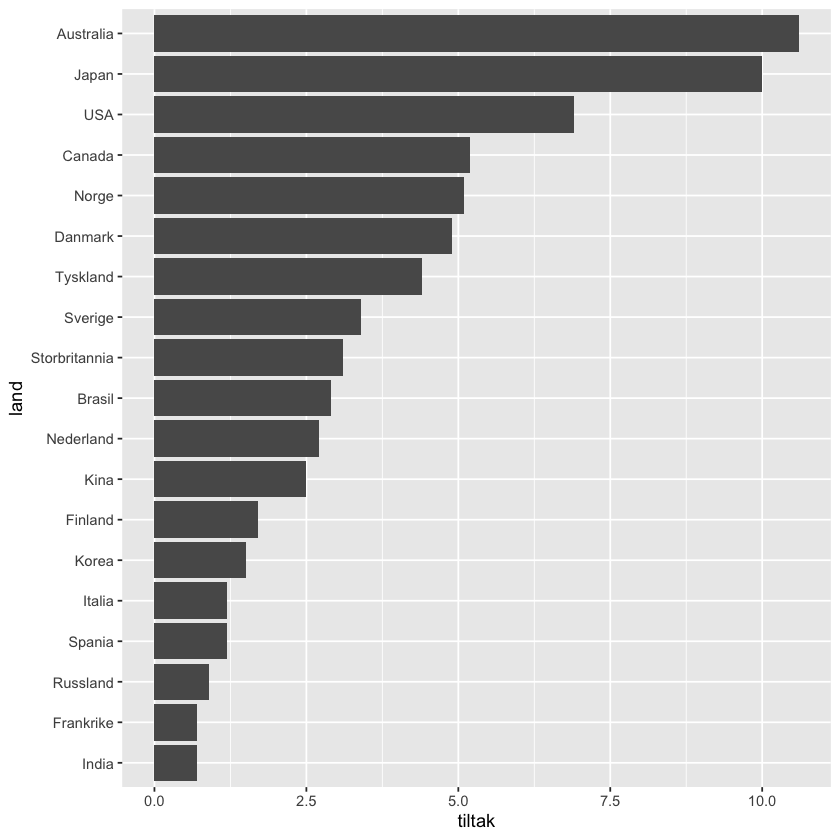

In [131]:
# we can change characters to factors and plot like eg here: 
budget %>%
  arrange(-desc(tiltak)) %>% 
  mutate(land = factor(land, levels=land)) %>% 
  ggplot() +
  geom_col(aes(tiltak,land))

### More visualizations

In [99]:
from_to

,start_station_name,end_station_name,num_trips
33900,Sinsenveien,Akerselvallmenningen,1
26758,Marienlystparken,Lørenveien,1
26759,Marienlystparken,Mailundveien,1
8380,Colbjørnsens gate,BI Nydalen,1
8381,Colbjørnsens gate,Badebakken,1
...,...,...,...
22807,Kværnerbyen,Bjørvika,255
32348,Saga Kino,Aker Brygge,277
13246,Frognerstranda,Tjuvholmen,310
42178,Tjuvholmen,Frognerstranda,317


In [132]:
num_trips_to <- trips %>% 
  group_by(end_station_name) %>% 
  summarise(num_trips = length(end_station_name),
            lat = first(end_station_latitude),
            lon = first(end_station_longitude)) %>% 
  arrange(num_trips) 


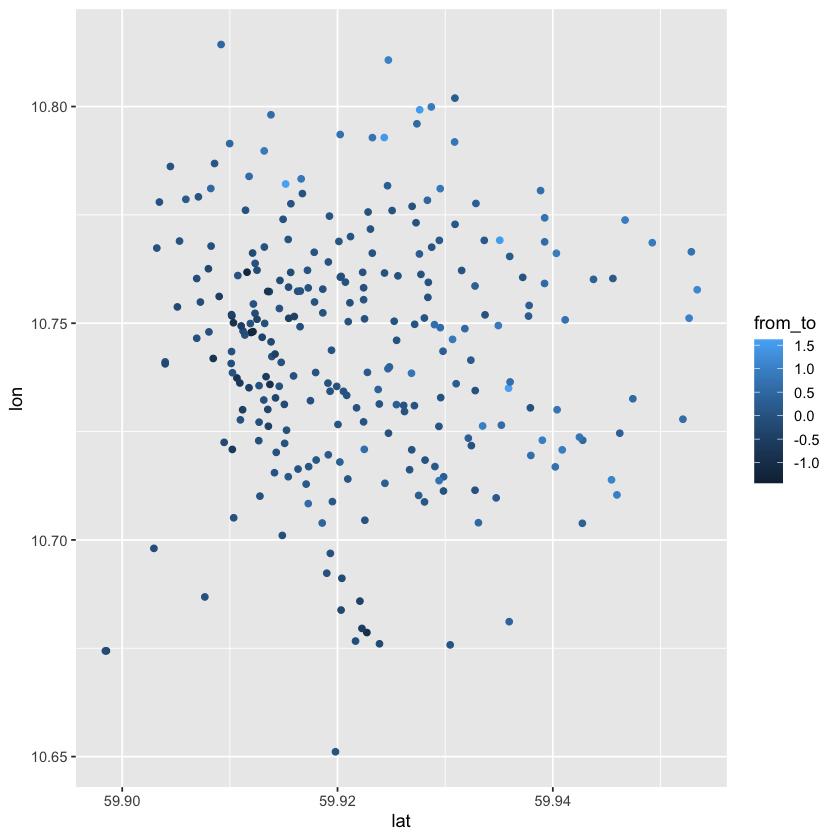

In [133]:
# plot
num_trips_from %>% 
  inner_join(num_trips_to, by = c("start_station_name"="end_station_name")) %>%
  mutate(from_to = log(num_trips.x/num_trips.y)) %>% 
  ggplot() +
  geom_point(aes(x=lat,y=lon, color=from_to)) 
 
